In [1]:
import sys
import io

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from copy import deepcopy
from pandas.plotting import scatter_matrix

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

Read diamond data

In [2]:
file_path = './diamonds-train.csv'

# Total Data 45849 Rows
df = pd.read_csv(file_path)

In [3]:
df.head(10)

,carat,cut,color,clarity,x,y,z,depth,table,price
0,1.62,Ideal,I,VS2,7.53,7.58,4.69,62.1,55.0,10501
1,0.30,Premium,G,SI1,4.39,4.35,2.57,58.8,60.0,574
2,1.37,Ideal,F,VS1,7.28,7.22,4.32,59.6,57.0,11649
3,0.33,Fair,H,VVS2,4.40,4.32,2.84,65.1,59.0,922
4,0.32,Very Good,F,VS2,4.43,4.48,2.62,58.8,62.0,602
5,0.51,Premium,E,SI2,5.15,5.12,3.22,62.7,52.0,1205
6,1.50,Good,H,VS2,7.22,7.27,4.61,63.6,58.0,10291
7,0.85,Ideal,G,VS1,6.09,6.11,3.77,61.8,55.0,4373
8,0.33,Ideal,F,VS1,4.46,4.49,2.74,61.2,56.0,723
9,1.10,Ideal,G,VS1,6.69,6.65,4.09,61.3,54.0,6535


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45849 entries, 0 to 45848
Data columns (total 10 columns):
carat      45849 non-null float64
cut        45849 non-null object
color      45849 non-null object
clarity    45849 non-null object
x          45849 non-null float64
y          45849 non-null float64
z          45849 non-null float64
depth      45849 non-null float64
table      45849 non-null float64
price      45849 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.5+ MB


In [5]:
df.describe()

,carat,x,y,z,depth,table,price
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797698,5.731171,5.734044,3.537613,61.744716,57.455582,3932.515562
std,0.473863,1.121454,1.140275,0.694809,1.428341,2.237592,3990.380545
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,950.000000
50%,0.700000,5.700000,5.710000,3.520000,61.800000,57.000000,2401.000000
75%,1.040000,6.540000,6.540000,4.030000,62.500000,59.000000,5322.000000
max,5.010000,10.740000,58.900000,8.060000,78.200000,95.000000,18823.000000


In [6]:
# Remove record where x or y or z are equal 0

df = df.drop(df[df.x == 0].index)
df = df.drop(df[df.y == 0].index)
df = df.drop(df[df.z == 0].index)

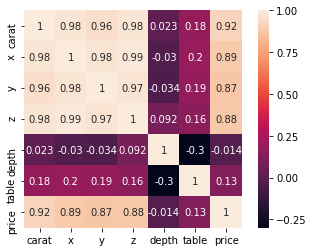

In [7]:
correlation = df.corr()
sns.heatmap(data = correlation, square = True , annot = True, cbar = True)

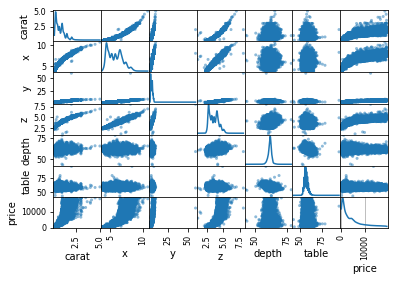

In [8]:
scatter_matrix(df, diagonal = 'kde')
plt.grid()
plt.show()

In [11]:
diamond_cut = {'Fair':0,
               'Good':1,
               'Very Good':2, 
               'Premium':3,
               'Ideal':4}

diamond_color = {'J':0,
                 'I':1, 
                 'H':2,
                 'G':3,
                 'F':4,
                 'E':5,
                 'D':6}

diamond_clarity = {'I1':0,
                   'SI2':1,
                   'SI1':2,
                   'VS2':3,
                   'VS1':4,
                   'VVS2':5,
                   'VVS1':6,
                   'IF':7}

#df.cut = df.cut.map(diamond_cut);
#df.clarity = df.clarity.map(diamond_clarity);
#df.color = df.color.map(diamond_color);

Executes One-Hot Encoding on categorical features like cut, color and clarity.

In [13]:
columns = ['cut','color','clarity']

df = pd.get_dummies(df, columns = columns, prefix = columns)

In [14]:
features_df = df.drop(labels=['price'], axis=1)

features_df = features_df
targets_df = df.price

Feature Normalization

The Mean Squared Error (MSE) cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.4 These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales.

WARNING:

When using Gradient Descent, you should ensure that all features have a similar scale, or else it will take much longer to converge.

In [15]:
# Min-Max Normalization
features_df = (features_df - features_df.min()) / (features_df.max() - features_df.min())

# Mean Normalization
#features_df = (features_df - features_df.mean()) /  (features_df.max() - features_df.min())

#print("Min:")
#print(features_df.min())
#print("Max:")
#print(features_df.max())

features_df.head()

,carat,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.295218,0.542083,0.070627,0.517883,0.542614,0.230769,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.020790,0.094151,0.012133,0.214592,0.448864,0.326923,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.243243,0.506419,0.064107,0.464950,0.471591,0.269231,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.027027,0.095578,0.011590,0.253219,0.627841,0.307692,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.024948,0.099857,0.014488,0.221745,0.448864,0.365385,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Split data in training set and validation set

In [16]:
training_set_size = 0.8 # (0 to 1)

training_size = round(features_df.shape[0] * training_set_size)

training_X = features_df.values[:training_size]
validation_X = features_df.values[training_size:]

training_Y = targets_df.values[:training_size]
validation_Y = targets_df.values[training_size:]

Best Epoch: [3512, 1999242.2727900976]


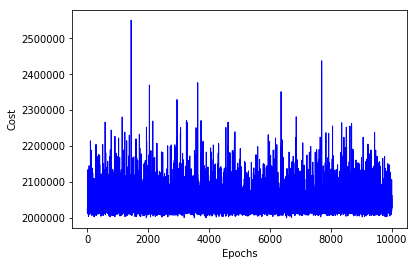

In [26]:
total_epoch = 10000

epochs = []

regressor = linear_model.SGDRegressor(loss = "squared_loss", 
                                      max_iter = 1, 
                                      fit_intercept = True,
                                      learning_rate = "constant",
                                      penalty = None,
                                      eta0 = 0.01)

select = float('inf')
best_epoch = None
best_model = None

for epoch in range(total_epoch):
    
    regressor.fit(training_X, training_Y)
    prediction_Y = regressor.predict(validation_X)
    mse = mean_squared_error(validation_Y, prediction_Y)
    
    if(mse < select):
        
        select = mse
        best_epoch = [epoch, mse]
        best_model = deepcopy(regressor)
    
    epochs.append([epoch, mse])

print("Best Epoch: " + str(best_epoch))
    
epoch_df = pd.DataFrame(data = epochs, columns = ['Epoch', 'Cost'])

plt.plot(epoch_df['Epoch'], epoch_df['Cost'], linewidth = 1.0, color = 'blue')

plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.show()

In [27]:
prediction_Y = best_model.predict(validation_X)

In [28]:
print('Coefficients: \n', best_model.coef_)
print('Intercept: \n', best_model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(validation_Y, prediction_Y))
print('Linear regression accuracy: ', best_model.score(validation_X, validation_Y))

Coefficients: 
 [13831.25094279 12433.24206866  1600.54484102  7438.93445396
  -638.09424724  -877.2441189  -1082.93663969  -625.34107896
  -265.6506035   -293.3372261   -385.82783821   355.71973372
   137.45274369    41.23993946  -156.25645331  -546.19944531
  -839.07428357 -1645.97562115 -3791.49628757  1226.94644497
  -686.79269283 -1570.92873094   310.16966529    28.38201307
  1021.01091479   809.61528675]
Intercept: 
 [-2653.09338646]
Mean squared error: 1999242.27
Linear regression accuracy:  0.8763265165136687


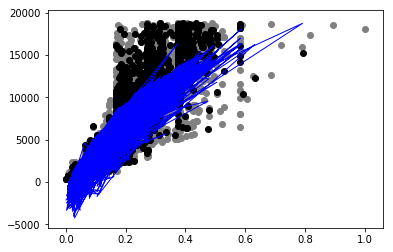

In [29]:
plt.scatter(training_X[:, 0:1], training_Y, color = 'gray')
plt.scatter(validation_X[:, 0:1], validation_Y, color = 'black')
plt.plot(validation_X[:, 0:1], prediction_Y, color = 'blue', linewidth = 1)

plt.xticks()
plt.yticks()

plt.show()

In [23]:
regressor = linear_model.LinearRegression(fit_intercept = True)

regressor.fit(training_X, training_Y)

prediction_Y = regressor.predict(validation_X)

prediction_Y

array([4736., 6952., 1052., ...,   44., 3948., 3928.])

In [24]:
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(validation_Y, prediction_Y))
print('Linear regression accuracy: ', regressor.score(validation_X, validation_Y))

Coefficients: 
 [ 5.53100611e+04 -1.07536502e+04  1.00975991e+05 -1.61953671e+04
  2.41526561e+03 -1.46421258e+03  2.35203538e+14  2.35203538e+14
  2.35203538e+14  2.35203538e+14  2.35203538e+14 -1.97112742e+15
 -1.97112742e+15 -1.97112742e+15 -1.97112742e+15 -1.97112742e+15
 -1.97112742e+15 -1.97112742e+15 -1.66106716e+16 -1.66106716e+16
 -1.66106716e+16 -1.66106716e+16 -1.66106716e+16 -1.66106716e+16
 -1.66106716e+16 -1.66106716e+16]
Intercept: 
 1.83465954807998e+16
Mean squared error: 2126158.35
Linear regression accuracy:  0.8684754650436121


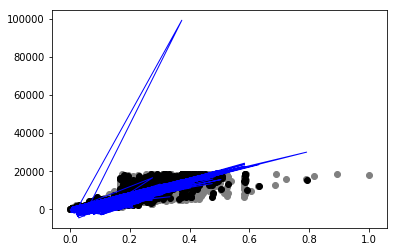

In [25]:
plt.scatter(training_X[:, 0:1], training_Y, color = 'gray')
plt.scatter(validation_X[:, 0:1], validation_Y, color = 'black')
plt.plot(validation_X[:, 0:1], prediction_Y, color = 'blue', linewidth = 1)

plt.xticks()
plt.yticks()

plt.show()